In [157]:
import numpy as np
import scipy as sp
from scipy import signal
from matplotlib import pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

# Projeto 4 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Pedro Araujo Cordeiro Viana
## Matrícula: 202067452

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [158]:
#Código das funções utilizadas.


# Questão 1

Considere um sinal $x\left[n\right]$ com 16 amostras:

$$
x\left[n\right] = \left\{ 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1\right\}
$$


## Questão 1a (1.0 ponto)

Calcule a DFT do sinal através da equação:

$$
X\left[k\right] = \sum_{n = 0}^{N-1} x\left[n\right] W_{N}^{kn}
$$

com $W_{N} = e^{-\frac{2 \pi}{N}}$.

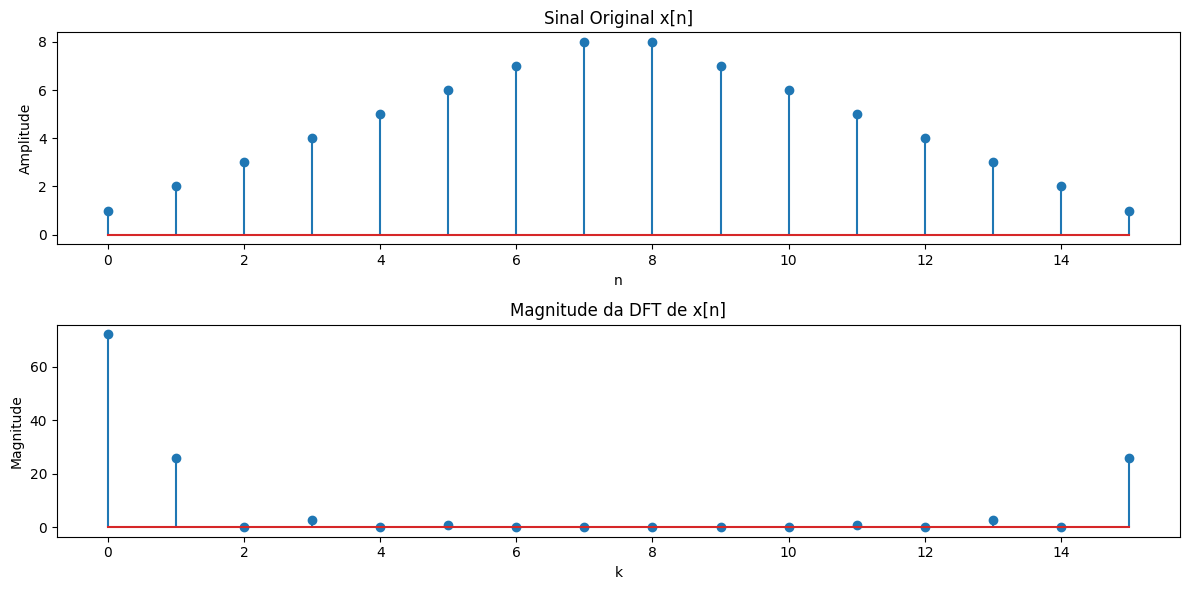

In [159]:
#Resposta da questão 1a

# Define o sinal x[n]
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1])

# Número de pontos no sinal
N = len(x)

# Inicializa a DFT
X = np.zeros(N, dtype=complex)

# Calcula a DFT em função de k usando a fórmula
for k in range(N):
    for n in range(N):
        W_N_kn = np.exp(-2j * np.pi * k * n / N)
        X[k] += x[n] * W_N_kn

# Plota o sinal original e a magnitude da DFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.stem(np.arange(N), x)
plt.title('Sinal Original x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.stem(np.arange(N), np.abs(X))
plt.title('Magnitude da DFT de x[n]')
plt.xlabel('k')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


## Questão 1b (1.0 ponto)

Considere a separação do sinal $x\left[n\right]$ em suas amostras pares e ímpares, $x_e\left[n\right]$ e $x_o\left[n\right]$, respectivamente. 

Calcule a DFT do sinal $x\left[n\right]$ através da equação:

$$
\hat{X}\left[k\right] = X_e\left[k\right] + W_{N}^{k} X_o\left[k\right]
$$

Compare as duas DFTs e calcule o erro médio absoluto (MAE) entre as DFTs calculadas pelas duas formas:

$$
MAE = \sum_{i = 0}^{N-1} \left| X\left[i\right] - \hat{X}\left[i\right]\right|
$$

Erro Médio Absoluto (MAE) entre as DFTs: 1.6435080342292823


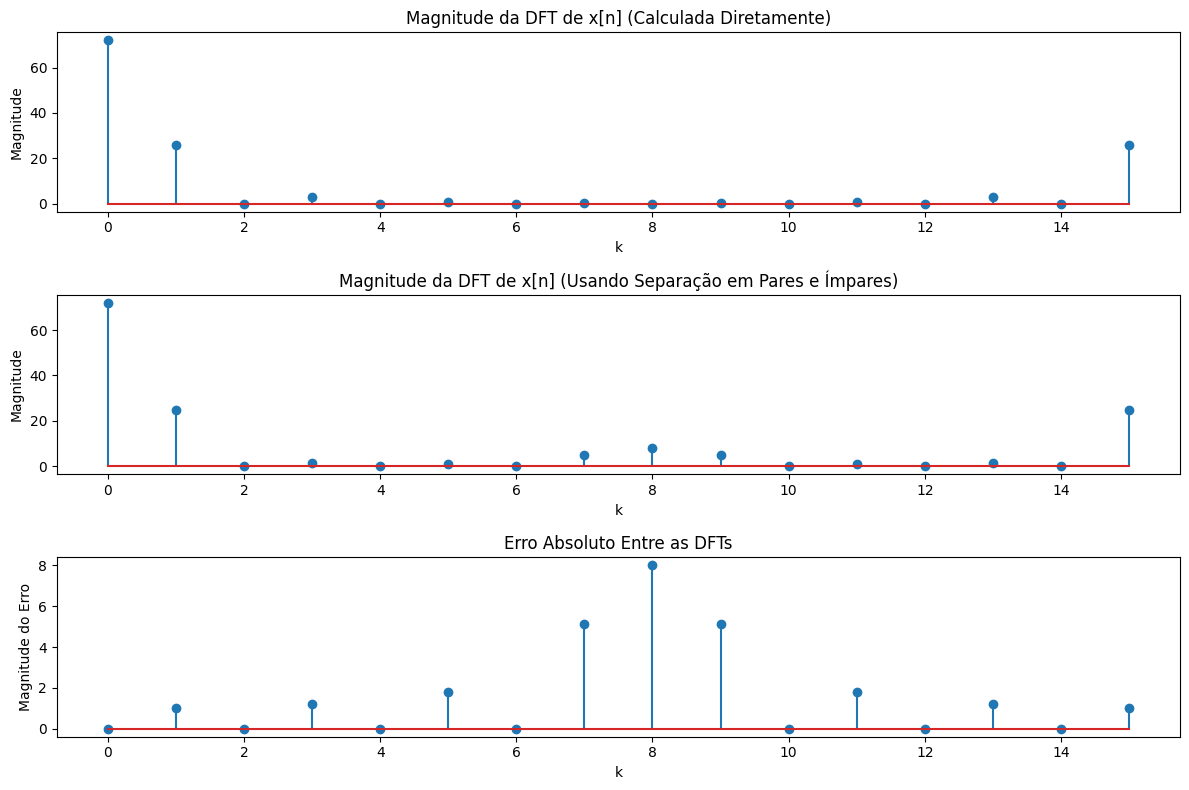

In [160]:
#Resposta da questão 1b

# Separa o sinal em amostras pares e ímpares
x_e = []
x_o = []
for k in x:
    if k % 2 == 0:
        x_e.append(k)
    else:
        x_o.append(k)

# Inicializa as DFTs
X_e = np.zeros(N//2, dtype=complex)
X_o = np.zeros(N//2, dtype=complex)

# Calcula a DFT dos sinais pares e ímpares
for k in range(N//2):
    for n in range(N//2):
        W_N_kn = np.exp(-2j * np.pi * k * n / (N//2))
        X_e[k] += x_e[n] * W_N_kn
        X_o[k] += x_o[n] * W_N_kn

# Combina as DFTs para obter a DFT completa
X_hat = np.zeros(N, dtype=complex)
for k in range(N):
    W_N_k = np.exp(-2j * np.pi * k / N)
    X_hat[k] = X_e[k % (N//2)] + W_N_k * X_o[k % (N//2)]

# Calcula a DFT diretamente usando a fórmula básica
X = np.zeros(N, dtype=complex)
for k in range(N):
    for n in range(N):
        W_N_kn = np.exp(-2j * np.pi * k * n / N)
        X[k] += x[n] * W_N_kn

# Calcula o erro médio absoluto (MAE)
MAE = np.mean(np.abs(X - X_hat))
print("Erro Médio Absoluto (MAE) entre as DFTs:", MAE)

# Plota as DFTs e a magnitude da DFT
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(np.arange(N), np.abs(X))
plt.title('Magnitude da DFT de x[n] (Calculada Diretamente)')
plt.xlabel('k')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.stem(np.arange(N), np.abs(X_hat))
plt.title('Magnitude da DFT de x[n] (Usando Separação em Pares e Ímpares)')
plt.xlabel('k')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 3)
plt.stem(np.arange(N), np.abs(X - X_hat))
plt.title('Erro Absoluto Entre as DFTs')
plt.xlabel('k')
plt.ylabel('Magnitude do Erro')

plt.tight_layout()
plt.show()



# Questão 2

O arquivo "potencia.txt" contém dados da envoltória real de um tom senoidal amostrado a uma taxa de $200$ amostras / segundo. Para a separação do desvanecimento em larga escala é necessário filtrar esse sinal com um filtro passa-baixas com frequência de corte em torno de $5$ Hz.


## Questão 2a (1.0  ponto)

Projete um filtro digital com a especificação desejada. Podem ser utilizadas as funções de design de filtro da PySDR (https://pysdr.org/content/filters.html), da própria biblioteca scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) ou mesmo bibliotecas web (http://t-filter.engineerjs.com/) . Plote a resposta em frequência e a resposta ao impulso do filtro projetado. 

15


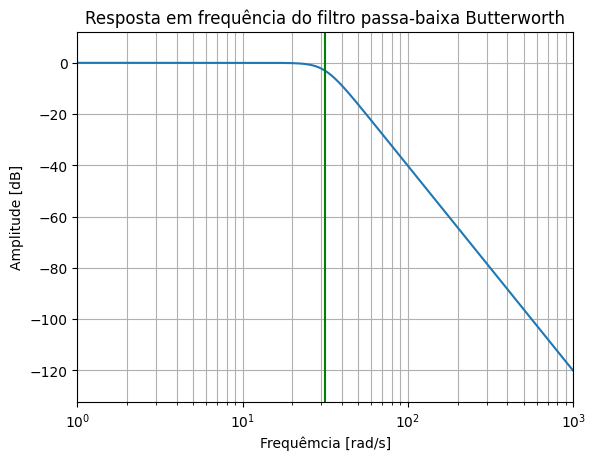

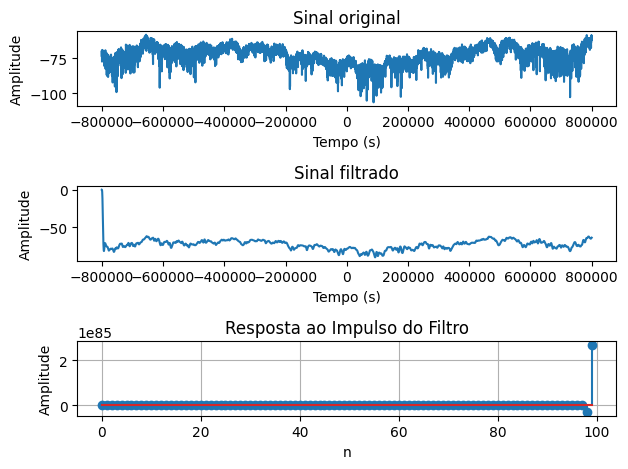

In [161]:
#Resposta da questão 2a

#Define os sinais
sinal = np.loadtxt('potencia.txt')
sig = sinal
N_2 = len(sinal)
T = N_2 * 200
t = np.linspace(-T/2, T/2, N_2, False)

# Impulso unitário
impulso = np.zeros(100)
impulso[0] = 1


print(n)
#Define os parâmetros do filtro passa-baixas scipy.butter
f_s = 200
f_c = 5
ordem = 4

#Cria o filtro
b, a = signal.butter(ordem, f_c *2*np.pi, 'low', analog=True)
w, h = signal.freqs(b, a)

# Plota a resposta na frequência

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Resposta em frequência do filtro passa-baixa Butterworth')
plt.xlabel('Frequêmcia [rad/s]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(f_c*2*np.pi, color='green') # cutoff frequency
plt.show()

#Filtra os sinais
sos = signal.butter(ordem, f_c, 'lowpass', output='sos', fs=f_s)
sinal_filtrado = signal.sosfilt(sos, sig)

#Plota os sinais

plt.subplot(3, 1, 1)
plt.plot(t, sig)
plt.title('Sinal original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, sinal_filtrado)
plt.title('Sinal filtrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')


#Calcula a resposta ao impulso
## Não consegui plotar a resposta ao impulso com o filtro butter professor

impulse_response = signal.sosfilt(sos, impulse_response)
    

plt.subplot(3, 1, 3)
plt.stem(np.arange(100), impulse_response)
plt.title('Resposta ao Impulso do Filtro')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


## Questão 2b (1.0 ponto)

Escreva uma função para processar uma janela de $N$ amostras do sinal desejado. $N$ deve ser escolhido em torno de 1 segundo de sinal, aproximadamente. A filtragem deve ser feita no domínio da DFT (pode ser utilizada alguma função para cálculo da fft em Python, como a função fft da biblioteca numpy).

In [162]:
#Resposta da questão 2b
def filtro_janela(sinal_N, f_s, f_c):
    
    # Calcula a DFT da janela
    dft_sinal = np.fft.fft(sinal_N)
    
    # Frequências correspondentes
    freqs = np.fft.fftfreq(fs, d=1/f_s)
    
    # Cria o filtro passa-baixas no domínio da frequência
    H = np.zeros(len(freqs))
    for j in range(len(freqs)):
        if freqs[j] >= f_c:
            H[j] == 0
        else:
            H[j] == 1
    
    # Aplica o filtro no domínio da frequência
    filtered_DFT = dft_sinal * H
    
    # Calcula a transformada inversa para obter a janela filtrada
    janela_filtrada = np.fft.ifft(dft_sinal).real
    
    return janela_filtrada



## Questão 2c (1.0  ponto)

Escreva uma função para combinar a saída do processamento de cada janela na saída do sistema, utilizando **um** dos métodos vistos (*overlap and add* ou *overlap and save*). Indique claramente o método escolhido.


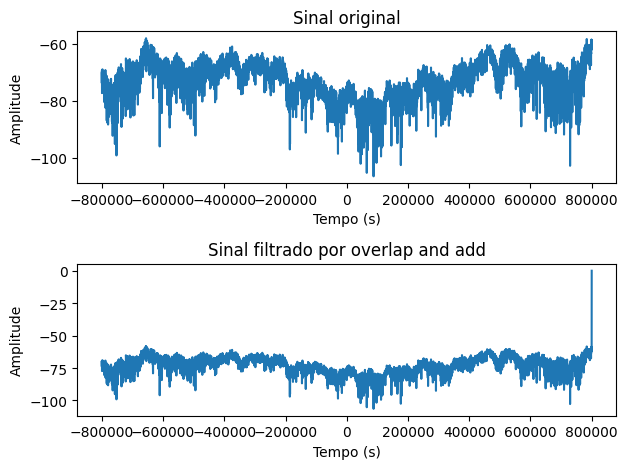

In [163]:
#Resposta da questão 2c

def overlap_add(sinal, fs, fc):
    #Numero de janelas
    n_janelas = len(sinal) // fs

    #Inicializa o array da janela filtrada
    sinal_concatenado = np.zeros(len(sinal))

    for i in range(n_janelas):
        #Separa uma janela de 200 amostras do sinal
        janela = sinal[i*fs:(i+1)*fs]

        #Aplica o filtro passa-baixas na frequência
        janela_filtrada = filtro_janela(janela, fs, fc)

        #Soma as janelas
        sinal_concatenado[i * fs:(i + 1) * fs] = janela_filtrada
        
    return sinal_concatenado


sinal = np.loadtxt("potencia.txt")
fs = 200
fc = 5
sinal_overlap = overlap_add(sinal, fs, fc)

plt.subplot(2, 1, 1)
plt.plot(t, sinal)
plt.title('Sinal original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, sinal_overlap)
plt.title('Sinal filtrado por overlap and add')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


## Questão 2d (1.0  ponto)

Plote o sinal de entrada e saída do sistema dado tanto pelo processamento em janelas como pelo processamento do sinal completo. Pode ser utilizada alguma função da biblioteca do python para calcular a saída do sistema usando o sinal completo.

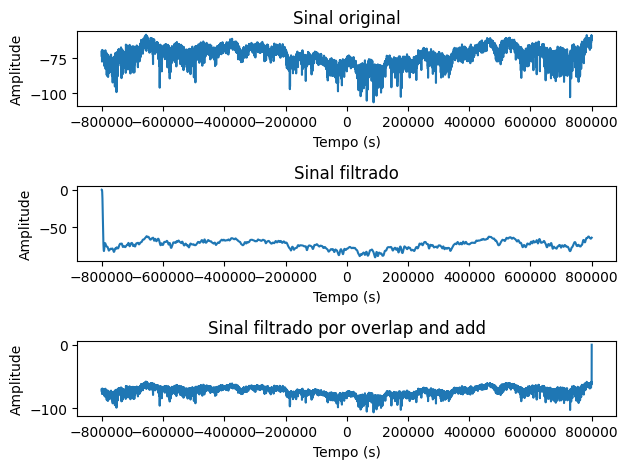

In [164]:
#Resposta da questão 2d

#Sinal original

plt.subplot(3, 1, 1)
plt.plot(t, sig)
plt.title('Sinal original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

#Plot dos sinais processados por completo

plt.subplot(3, 1, 2)
plt.plot(t, sinal_filtrado)
plt.title('Sinal filtrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

#Plot do sinal processado por janelas com overlap and add

plt.subplot(3, 1, 3)
plt.plot(t, sinal_overlap)
plt.title('Sinal filtrado por overlap and add')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()

# Questão 3

A equação diferença para um filtro FIR de tamanho $N$ pode ser escrita como:

$$
\begin{align}
	y\left[n\right] &= h_0 x\left[n\right] + h_1 x\left[n-1\right] + h_2 x\left[n-2\right] + h_3 \left[n-3\right] + \ldots + h_{N-1} x\left[n - \left(N- 1\right)\right] \\
	       &= \sum_{k=0}^{N-1} h_k x\left[n - k\right] 
\end{align}
$$

Os coeficientes do filtro, ou \textit{taps}, são expressados usando a variável $h_k$ para enfatizar que os próprios coeficientes representam a resposta ao impulso do filtro. A resposta em frequência do filtro é:

$$
\begin{align}
	H\left( \Omega \right) = \frac{Y\left( \Omega \right)}{X\left( \Omega \right)} = \sum_{k=0}^{N-1} h_k e^{-j \Omega k}
\end{align}
$$

Como $H\left( \Omega \right)$ é uma função com período $2 \pi$ da variável contínua $\Omega$, é suficiente especificar $H\left( \Omega \right)$ em apenas um período $0 \leq \Omega < 2 \pi$. 

Em muitas aplicações, a resposta em magnitude desejada do filtro $\left|H_d \left( \Omega \right)\right|$ é conhecida, mas não os coeficientes $h_k$ do filtro. A questão é, então, determinar os coeficientes do filtro a partir da resposta em magnitude desejada. Podemos fazer isso simplesmente amostrando a resposta em frequência desejada $\left|H_d \left( \Omega \right)\right|$ com $N$ amostras em um período, e então fazendo a DFT inversa dessas amostras (obtendo $h\left[n\right]$). Note que a definição dos coeficientes $h_k$ é suficiente para determinar o sistema do filtro FIR. Além disso, como $H \left( \Omega \right)$ foi obtido amostrando $\left|H_d \left( \Omega \right)\right|$ para algumas frequências, garantimos que a resposta em frequência do filtro projeto será igual a resposta em frequência desejada ao menos nos valores de amostragem. Finalmente, observe que, ao fazer a DFT inversa, alguns coeficientes $h_k$ podem ter uma pequena componente imaginária que deve ser descartada para o projeto de um filtro real. 



## Questão 3a (1.0  ponto)

Considere então um sinal de ECG amostrado a uma taxa de $500$ Hz. Projete um filtro digital FIR através da amostragem de frequência passa-baixas com frequência de corte igual a $50$ Hz. 

Plote a resposta ao impulso $h\left[n\right]$ e a resposta em frequência $H\left(\Omega\right)$ do filtro para $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com a resposta em frequência desejada. 

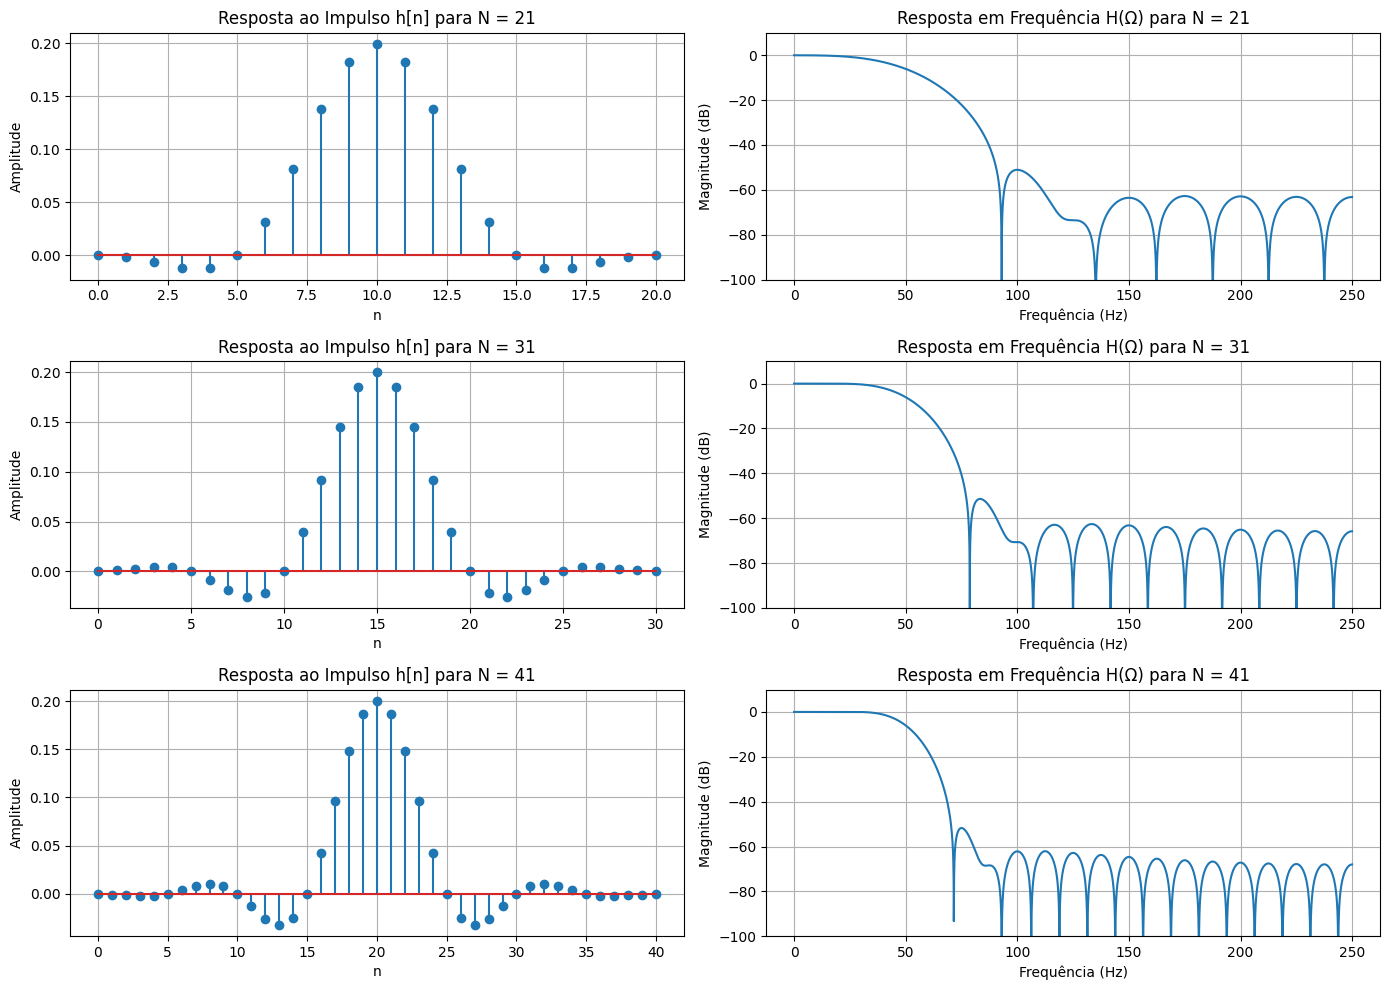

In [165]:
#Resposta da questão 3a

# Parâmetros do filtro
fs = 500  # Frequência de amostragem (Hz)
cutoff = 50  # Frequência de corte (Hz)

# Definindo o tamanho dos filtros
N_values = [21, 31, 41]

# Plotando as respostas ao impulso e em frequência para diferentes N
plt.figure(figsize=(14, 10))

for N in N_values:
    # Projetando o filtro FIR
    h = firwin(N, cutoff / (0.5 * fs), window='hamming')
    
    # Calculando a resposta em frequência
    w, H = freqz(h, worN=8000)
    
    # Convertendo a frequência de rad/sample para Hz
    freqs = w * fs / (2 * np.pi)
    
    # Plotando a resposta ao impulso
    plt.subplot(3, 2, N_values.index(N)*2 + 1)
    plt.stem(np.arange(N), h)
    plt.title(f'Resposta ao Impulso h[n] para N = {N}')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plotando a resposta em frequência
    plt.subplot(3, 2, N_values.index(N)*2 + 2)
    plt.plot(freqs, 20 * np.log10(np.abs(H)))
    plt.title(f'Resposta em Frequência H(Ω) para N = {N}')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-100, 10)
    plt.grid(True)

plt.tight_layout()
plt.show()


## Questão 3b (1.0  ponto)

A resposta ao impulso do filtro do item anterior deveria ser uma função *sinc*, que é uma função com suporte infinito. Porém, a amostragem amostra apenas a parte para $n$ positivo, gerando uma descontinuidade e uma resposta em frequência mais pobre. Uma forma de melhorar essa amostragem é centralizar a função *sinc* - para isso, devemos multiplicar a resposta em frequência do filtro $H\left(\Omega\right)$ por $e^{-j \Omega \frac{\left(N - 1\right)}{2}}$. Utilize essa técnica para gerar novos filtros com $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com os filtros do item anterior com o mesmo tamanho.

In [166]:
#Resposta da questão 3b

## Questão 3c (1.0  ponto)

Aplique o filtro com $N = 41$ no sinal do arquivo "noisy\_ecg\_data\_3.mat". Compare o sinal de entrada com o sinal de saída. O que acontece com os picos do ECG? 

In [167]:
#Resposta da questão 3c

sinal = sp.io.loadmat('noisy_ecg_data_3.mat')['noisy_ecg_3'].ravel()

## Questão 3d (1.0  ponto)

Utilize a técnica de *zero-phase filtering* com o filtro do item anterior. Compare a saída do sistema com e sem a aplicação da técnica.

In [168]:
#Resposta da questão 3d